# Introduction

Titanic shipwreck is one of the biggest accidents in the world shipping history. The Titanic ship was such a big ship that it was named as "unsinkable". The ship hit a large iceberg  and 1502 of the 2224 passengers carried by Titanic drowned. 

In this dataset we will invesitgate the features and try to find which passengers are more likely to survive. We will use Machine Learning Algorithms to predict the survived passengers.In the end we will compare the performance of the various Machine Learning Algorithms. 


<font color = 'blue'>
 Content:
   
   1. [Load and check data](#1)
   2. [Information about variables](#2)
       * 2.1 [Univariate variable analysis](#3)
           * 2.1.1 [Categorical variable analysis](#4)
           * 2.1.2 [Numerical variable analysis](#5)   
   3. [Basic data analysis](#6)
   4. [Detection of outliers](#7)
   5. [Missing values](#8)
       * 5.1 [Detecting missing values](#9)
       * 5.2 [Filling missing values](#10)
           * 5.2.1 [Filling missing values in "Embarked" variable](#11)
           * 5.2.2 [Filling missing values in "Fare" variable](#12)
           
   6. [Visualization](#13)
       * 6.1 [Correlation matrix](#14)
       * 6.2 [SibSp and Survived](#15)
       * 6.3 [Parch and Survived](#16)
       * 6.4 [Pclass and Survived](#17)
       * 6.5 [Age and Survived](#18)
       * 6.6 [Pclass, Age and Survived](#19)
       * 6.7 [Embarked, Sex, Pclass and Survived](#20)
       * 6.8 [Embarked, Sex, Fare and Survived](#21)
       * 6.9 [Pclass, Sex and Survived](#22)
       
   7. [Filling the missing values in Age variable](#23)
   8. [Feature engineering](#24)


In [222]:
# Import the libraries that we will use in this project.

# Using numpy and pandas for data manupilations and processing. 
import numpy as np 
import pandas as pd


# Using Matplotlib and Seaborn for visualisation.

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns

from collections import Counter


import warnings
warnings.filterwarnings("ignore")






<a id = '1'></a><br>
# 1. Load and check data

In [223]:
# Import train and test data, and set them as df_train and df_test, accordingly.
df_train = pd.read_csv("/Users/muhammet/Desktop/kaggle_titanic_competition/train.csv")
df_test = pd.read_csv("/Users/muhammet/Desktop/kaggle_titanic_competition/test.csv")
test_Passenger_id = df_test["PassengerId"]

In [224]:
# Let's look at colums of the train dataframe quickly.
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [225]:
# It shows the train columns and their types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [226]:
# That gives the FİRST 5 rows of the df_train 
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [227]:
# That gives the LAST 5 rows of the df_train 
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [228]:
# shows the statistical information of the train columns
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<a id = '2'></a><br>
# 2. Information about variables


Description of the variables in dataset:

* PassengerId : refers to passenger's id, which is unique
* Survived : if passenger was survived, it takes 1, otherwise it is 0.
* Pclass : refers to ticket's class. 1= 1st, 2= 2nd , 3 = 3rd (1st is the highest class)
* Name : name of passenger
* Sex : gender of passenger
* Age : age of passenger
* SibSp : the number of siblings / spouses aboard the Titanic (mistresses and fiancés were ignored)
* Parch : defines family relations such as mother, father,daughter, son, stepdaughter, stepson (Some children travelled only with a nanny, therefore parch=0 for them.)
* Ticket : Ticket number
* Fare : cost written on the pessenger's ticket
* Cabin : cabin number
* Embarked : defines which passenger embarked on the Titanic from which port (C = Cherbourg, Q = Queenstown, S = Southampton )

<a id = '3'></a><br>
##  2.1 Univariate variable analysis
 In this section we will analyse the variables individually which means that we will ignore the relations between variables. Univariate variable analysis can be divided into 2 groups as follow:
 
   * Categorical variable analysis
   * Numerical variable analysis

<a id = '4'></a><br>
## 2.1.1 Categorical variable analysis


In [229]:
# We define a function that choose the variables and their own values and plot them. 

def bar_plot(variable):
    %config InlineBackend.figure_format ='retina'
    var = df_train[variable]
    
    varValue = var.value_counts()
    
    
    
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show
    print("{}: \n {}".format(variable, varValue))
    


Survived: 
 0    549
1    342
Name: Survived, dtype: int64
Sex: 
 male      577
female    314
Name: Sex, dtype: int64
Pclass: 
 3    491
1    216
2    184
Name: Pclass, dtype: int64
Embarked: 
 S    644
C    168
Q     77
Name: Embarked, dtype: int64
SibSp: 
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Parch: 
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


[None, None, None, None, None, None]

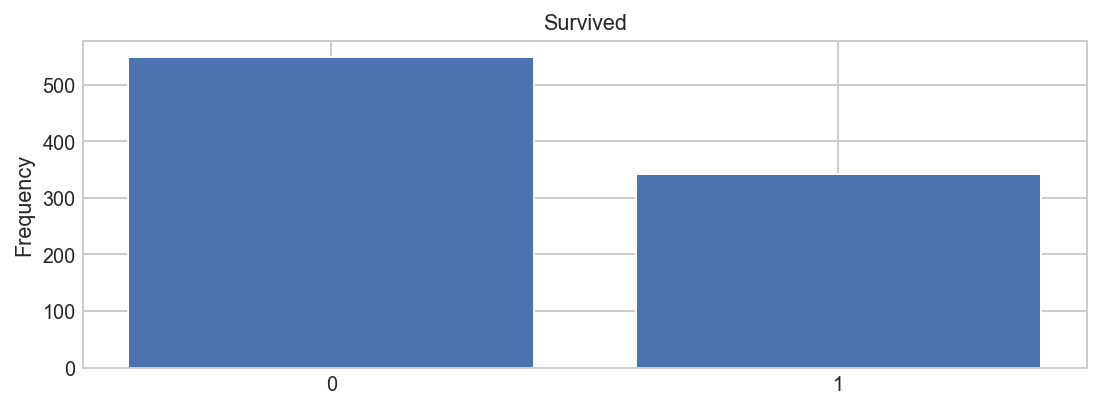

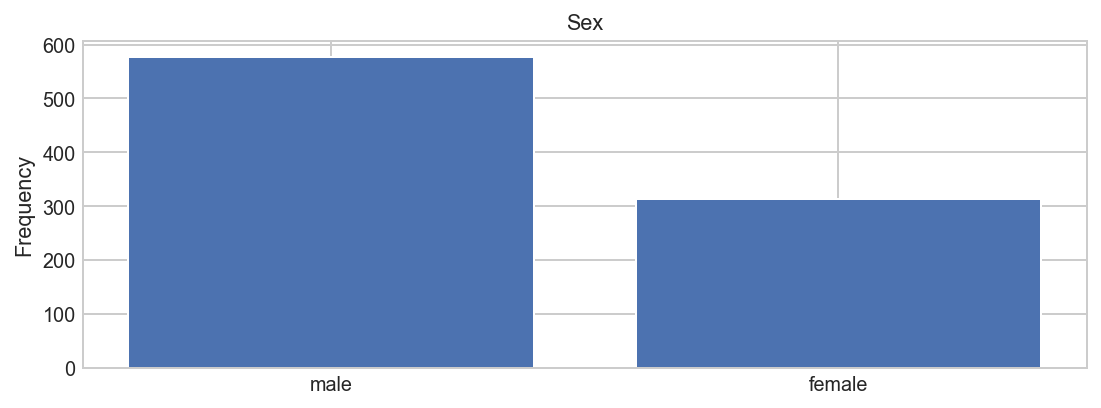

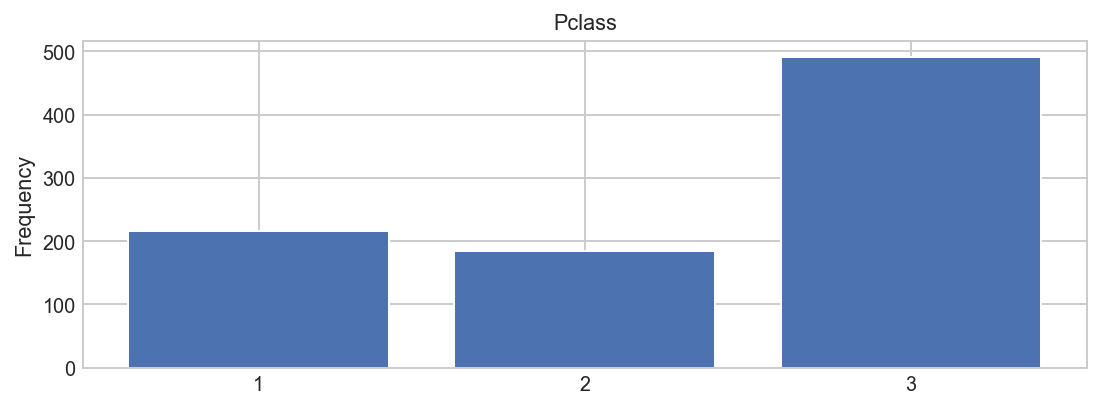

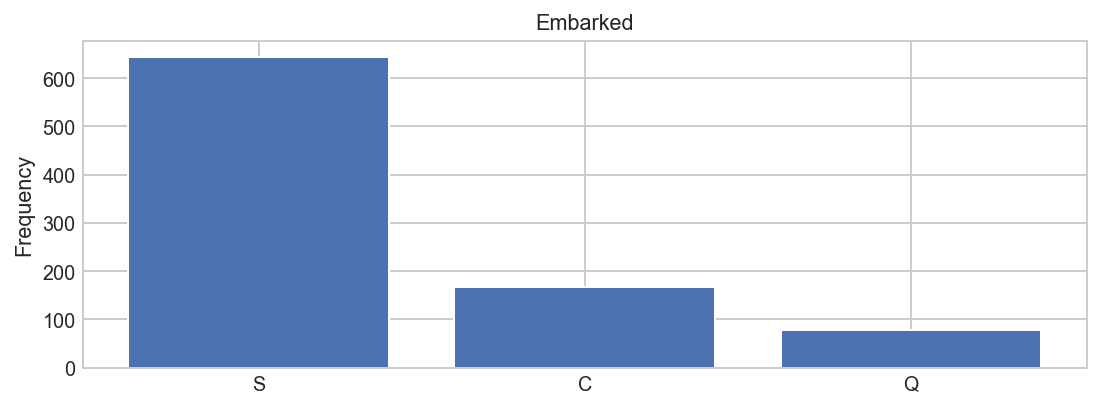

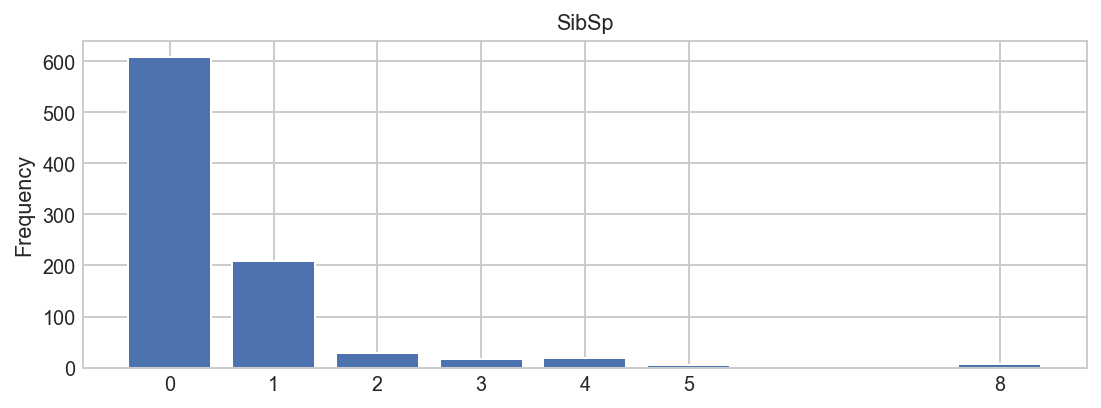

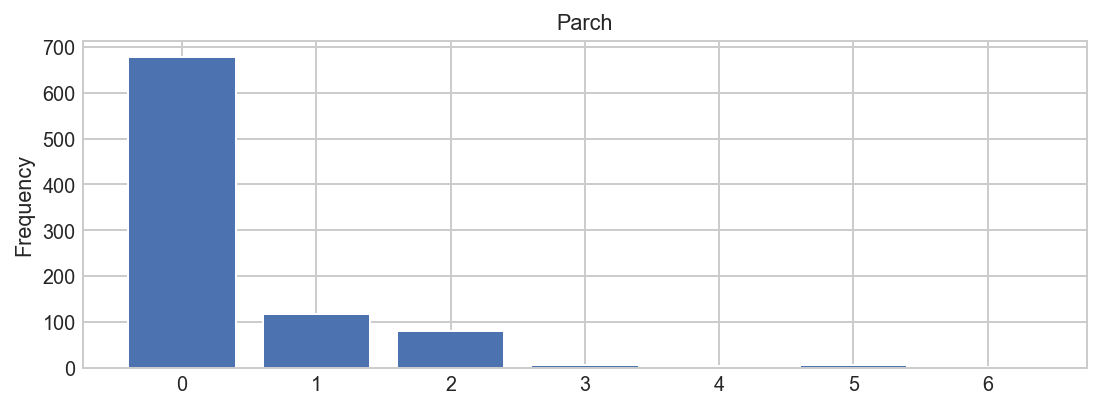

In [230]:
# We are plotting the categorical variables 
category1=["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
list(map(lambda x:bar_plot(x), category1))

In [231]:
# They have lots of different categories, therefore we donot plot them. 
category2=["Cabin", "Name", "Ticket"]
list(map(lambda x:print("{} \n".format(df_train[x].value_counts())), category2))
    

B96 B98        4
C23 C25 C27    4
G6             4
C22 C26        3
F2             3
              ..
C45            1
B41            1
D47            1
D21            1
C50            1
Name: Cabin, Length: 147, dtype: int64 

Dahl, Mr. Karl Edwart             1
Hays, Miss. Margaret Bechstein    1
Coleff, Mr. Peju                  1
Carter, Rev. Ernest Courtenay     1
Danoff, Mr. Yoto                  1
                                 ..
Osen, Mr. Olaf Elon               1
McGowan, Miss. Anna "Annie"       1
Ringhini, Mr. Sante               1
Markun, Mr. Johann                1
Lemberopolous, Mr. Peter L        1
Name: Name, Length: 891, dtype: int64 

347082        7
CA. 2343      7
1601          7
3101295       6
347088        6
             ..
315088        1
386525        1
SCO/W 1585    1
234604        1
234360        1
Name: Ticket, Length: 681, dtype: int64 



[None, None, None]

<a id = '5'></a><br>

## 2.1.2 Numerical variable analysis

In [232]:
# We will use histogram to plot values of the numerical variables.

def hist_plot(variable):
    %config InlineBackend.figure_format ='retina'
    plt.figure(figsize=(9,3))
    plt.hist(df_train[variable],bins = 50)
    
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with histogram". format(variable))
    plt.show
    

[None, None, None]

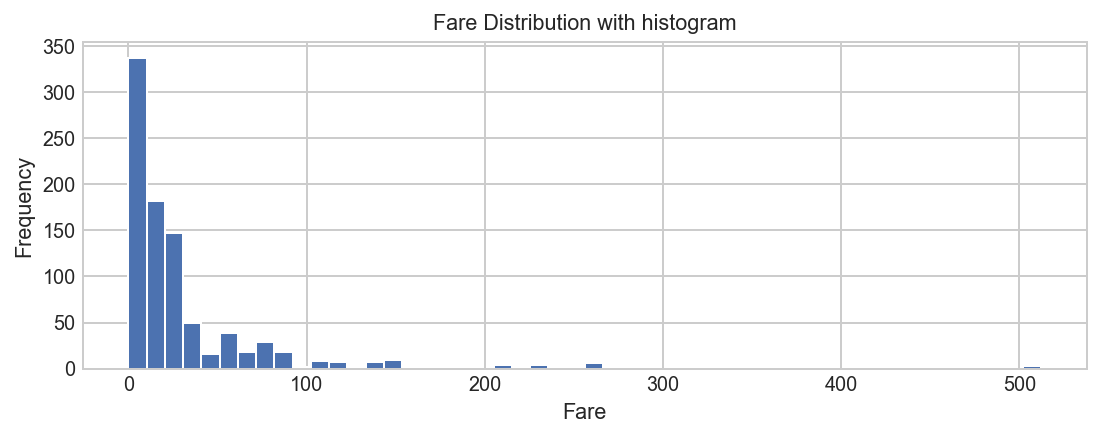

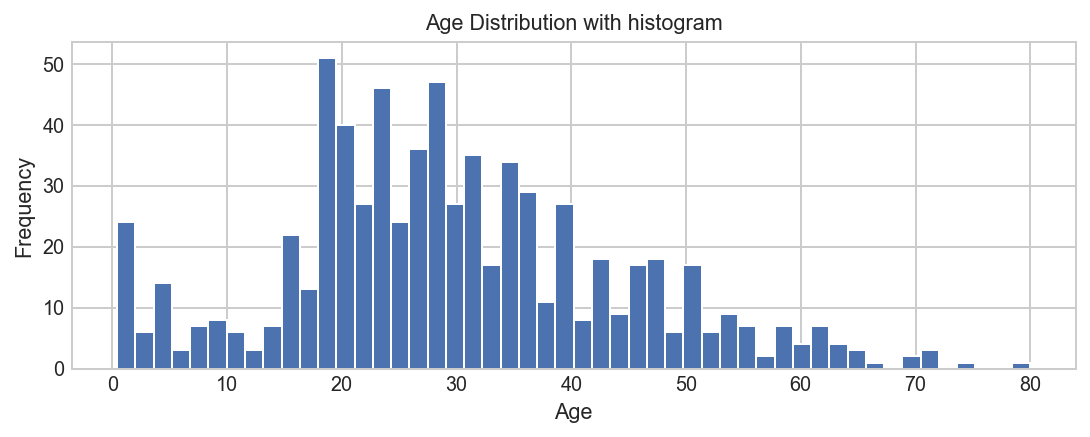

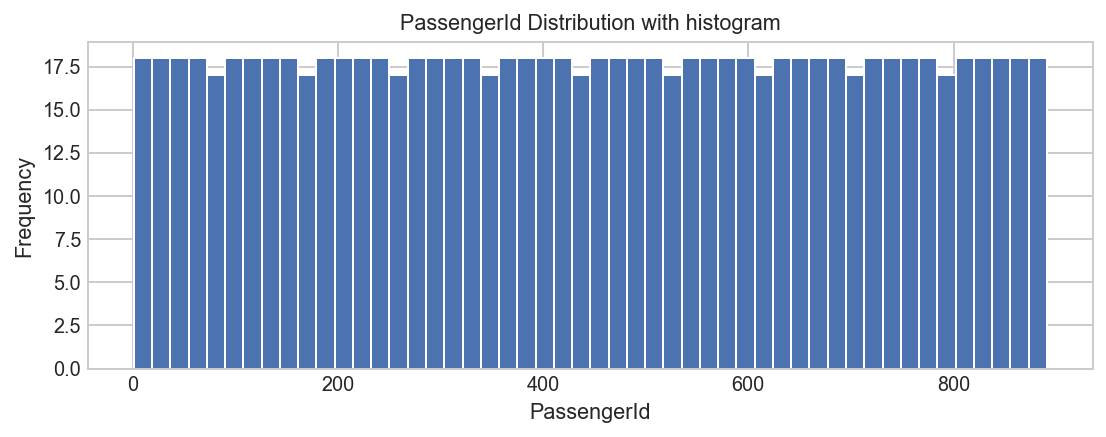

In [233]:
numericalVariables=["Fare", "Age", "PassengerId"]
list(map(lambda x: hist_plot(x), numericalVariables))

<a id = '6'></a><br>
# 3. Basic data analysis

In this section we will analyse the relationships between the variables and show the pattern
Following variables pair will be analysed:

* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [234]:
 # we will check whether it is relation between Pclass and Survived
    
df_train[["Pclass","Survived"]].groupby("Pclass", as_index=False).mean().sort_values(by="Survived", ascending = False)



,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [235]:
# we will check whether it is relation between Sex and Survived 
    
df_train[["Sex","Survived"]].groupby("Sex", as_index=False).mean().sort_values(by="Survived", ascending = False)



,Sex,Survived
0,female,0.742038
1,male,0.188908


In [236]:
 # we will check whether it is relation between SibSp and Survived
    
df_train[["SibSp","Survived"]].groupby("SibSp", as_index=False).mean().sort_values(by="Survived", ascending = False)



,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [237]:
 # we will check whether it is relation between Parch and Survived
    
df_train[["Parch","Survived"]].groupby("Parch", as_index=False).mean().sort_values(by="Survived", ascending = False)



,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


 **From the relationships of variables, the following can be understood:**
* First class passengers have the highest survival rate with 62.9% while 3rd class passengers have the lowest survival rate with 24.2
* 74% of women survived, while 18% of men survived
* The survival rate of passengers with one or two siblings is significantly higher than others.
* The survival rate of people with 3 family members on board is the highest with 60%, but the survival rates of people with 1 and 2 family members are also quite high. It is 55% and 50% respectively.



From here, we can clearly conclude that if a person is **a woman** and has **a first-class ticket**, the probability of survival is **very high**


<a id = '7'></a><br>
# 4. Detection of outliers

In [238]:
def outlier_detection(df, features):
    outlier_indices = []
    
    for i in features:
        # 1st quirtile
        q1 = np.percentile(df[i],25)
        
        # 3rd quirtile
        q3 = np.percentile(df[i],75)
        
        # IQR
        IQR = q3 - q1
        
        # Outlier step
        
        outlier_step = IQR * 1.5
        
        # detect outliers and their indices 
        
        outliers_list = df[(df[i] < q1-outlier_step) | (df[i]> q3 + outlier_step)].index
        
        
        # Storing indices
        
        outlier_indices.extend(outliers_list)
        
        # Here we mean that if a feature has more than two outliers, we will store the indices of the outliers. 
        # Otherwise we are not intersted in outliers of a feature 
        outlier_indices1 = Counter(outlier_indices)
        multiple_outliers = list(j for j,v in outlier_indices1.items() if v>2 )
        
    return multiple_outliers

In [239]:
# Here we are running the outlier_detection function.
df_train.loc[outlier_detection(df_train, ["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [240]:
# Now we are dropping the outliers and reseting the index
df_train = df_train.drop(outlier_detection(df_train, ["Age", "SibSp", "Parch", "Fare"]), axis = 0).reset_index(drop = True)

<a id = '8'></a><br>
# 5. Missing values
       
Missing values that are unusable values (such as #, ?, - and NaN (not a number)), have to get handled in order to create machine learning model with high accuracy. 
In this section we will detect the missing values and replace them with meaningful numbers.

<a id = '9'></a><br>
### 5.1 Detecting missing values


In [241]:
# In order not to damage our original data, we assigned train and test sets to new variables by the copy method during the concatenating processes.
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

# concatenating train and test sets
df_new_train = pd.concat([df_train_copy,df_test_copy], axis = 0).reset_index(drop = True)
df_new_train 


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1294,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1295,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
1296,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
1297,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


In [242]:
# It shows all columns in the data set that have missing values.
df_new_train.columns[df_new_train.isnull().any()]

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Survived'], dtype='object')

In [243]:
# It shows the sumation of the missing values in each variable.
df_new_train.isnull().sum()

Age             256
Cabin          1007
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

**As we can see,** we do not have information about 
- ages og 256 passengers, 
- 1007 passengers' cabin numbers, 
- embarking port of 2 passengers and 
- ticket price of a passenger. 

There is also 418 missing values in "survived" column that comes from test_set, because the test_set does not have "survived" column.   

<a id = '10'></a><br>
### 5.2 Filling missing values

* Column "Embarked" has 2 missing values
* Column "Fare" has just one missing value
 

<a id = '11'></a><br>
### 5.2.1 Filling missing values in "Embarked" variable


In [244]:
# Let's see which indices of "Embarked" variable has missing values.
df_new_train[df_new_train["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
60,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
821,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


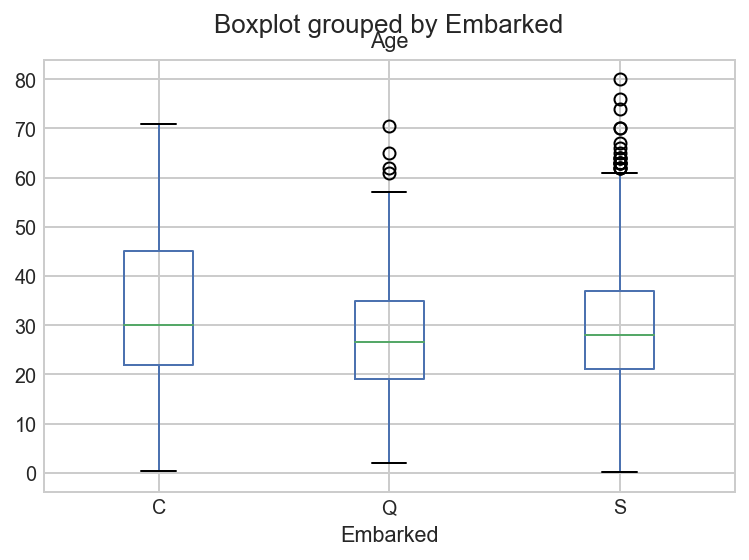

In [245]:
# Boxplot of "Age" grouped by "Embarked" variable. 
%config InlineBackend.figure_format ='retina'
df_new_train.boxplot(column = "Age", by = "Embarked")

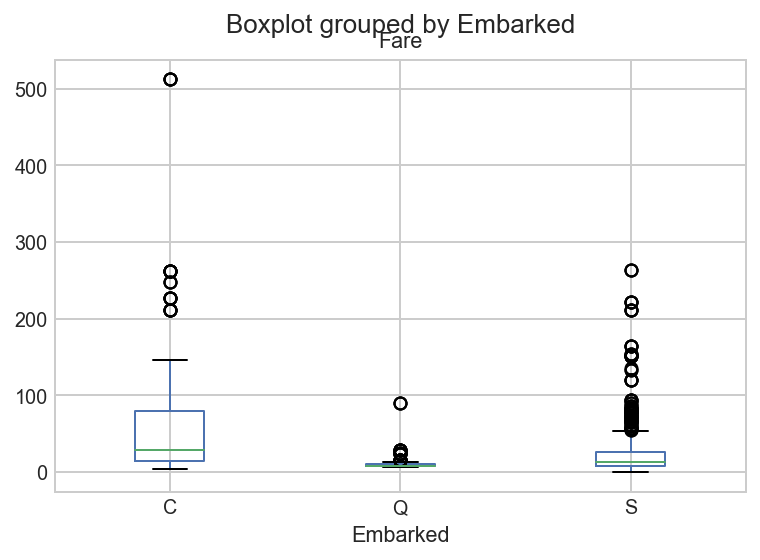

In [246]:
# Boxplot of "Fare" grouped by "Embarked" variable. 
%config InlineBackend.figure_format ='retina'
df_new_train.boxplot(column = "Fare", by = "Embarked")

It can be concluded from the boxplots that median value of Passengers' age which embarked on the board from Cherbourg (C) is the closest to the  age values of the columns with missing data.
In terms of the median values of "Fare" variable,  passenger embarked on the board from Cherbourg paid the closest fare to the  fare values of the columns with missing data.

**It can be said that missing values of "Embarked" variable can be filled by Cherbourg (C)**

In [247]:
# Filling the missing values in "Embarked" variable
df_new_train["Embarked"] = df_new_train["Embarked"].fillna("C")


<a id = '12'></a><br>
### 5.2.2 Filling missing values in "Fare" variable

In [248]:
# Let's see which indices of "Fare" variable has missing values.
df_new_train[df_new_train["Fare"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1033,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


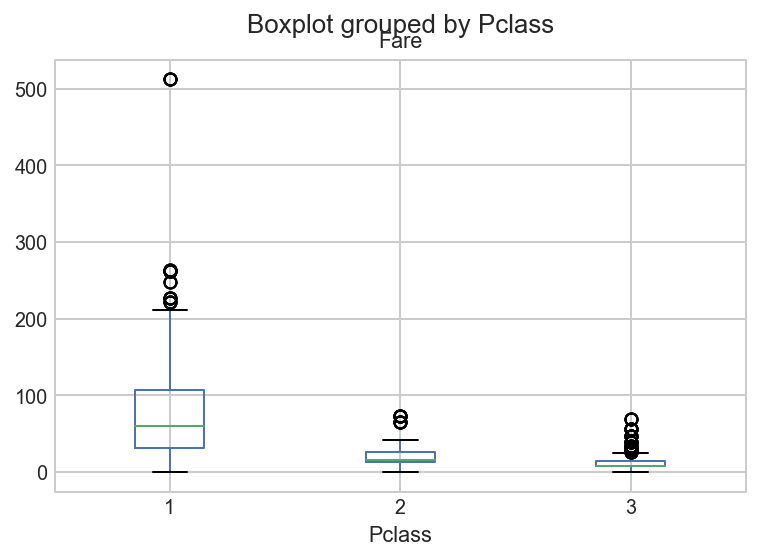

In [249]:
# Boxplot of "Fare" grouped by "Embarked" variable. 
%config InlineBackend.figure_format ='retina'
df_new_train.boxplot(column = "Fare", by = "Pclass")

In [250]:
# Median values of the "Fare" column grouped by "Pclass"
df_new_train[["Pclass","Fare"]].groupby("Pclass", as_index=False).median()

,Pclass,Fare
0,1,59.7000
1,2,15.0458
2,3,8.0500


It can be seen that the row above with missing value belongs to 3rd class passenger. Therfore we can use the fare of the 3rd class passengers to fill the missing value. As we see from the boxplot that "Fare" values of 3rd class have lots of outliers, therefore it can be better if we use median value of  3rd class passengers' "Fare". 



In [251]:
# Filling the missing values in "Fare" variable by  the median value of  3rd class passengers' "Fare" . 
df_new_train["Fare"] = df_new_train["Fare"].fillna(df_new_train[["Pclass","Fare"]].groupby("Pclass", as_index=False).median()["Fare"][2])

<a id = '13'></a><br>
# 6. Visualization

In this section we will illustrate the relationship between variables by using visualization tools. we will visualize relation between :
*  SibSp and Survived
*  Parch and Survived
*  Pclass and Survived
*  Age and Survived
*  Pclass, Age and Survived
*  SibSp and Survived
*  Embarked, Sex, Pclass and Survived
*  Embarked, Sex, Pclass and Survived
*  correlation matrix

<a id = '14'></a><br>
## 6.1 Correlation matrix

In [252]:

# This shows the correlations between numerical train columns 
df_new_train.corr()


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.188295,-0.148784,0.026685,-0.411777,-0.242127,-0.076867
Fare,0.188295,1.000000,0.203081,0.047721,-0.562396,0.131987,0.264613
Parch,-0.148784,0.203081,1.000000,0.019635,0.016823,0.350474,0.092819
PassengerId,0.026685,0.047721,0.019635,1.000000,-0.041372,-0.035835,-0.003089
Pclass,-0.411777,-0.562396,0.016823,-0.041372,1.000000,0.044041,-0.334097
SibSp,-0.242127,0.131987,0.350474,-0.035835,0.044041,1.000000,0.003330
Survived,-0.076867,0.264613,0.092819,-0.003089,-0.334097,0.003330,1.000000


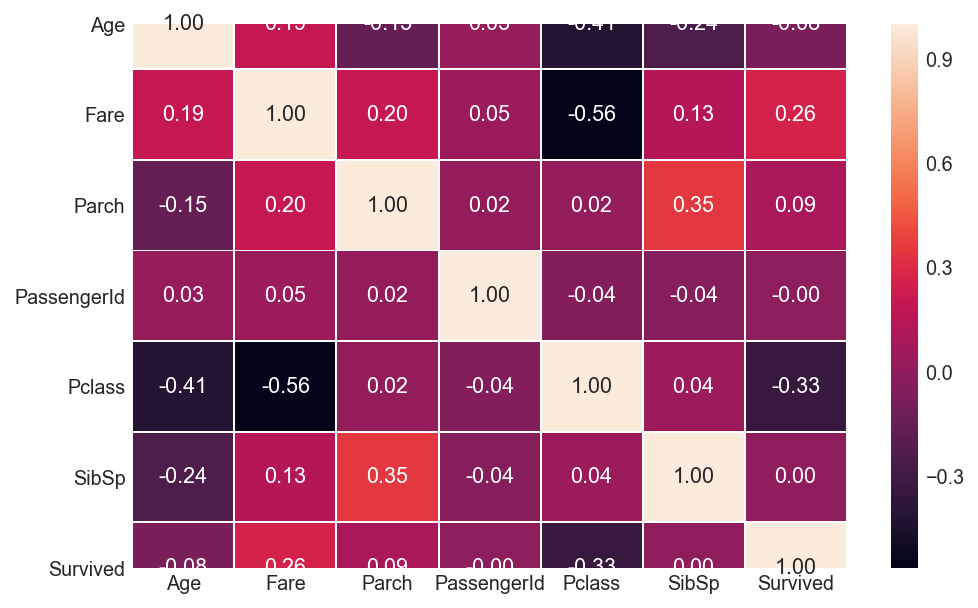

In [253]:
# Let's visualize the correlations between features of the train set.
%config InlineBackend.figure_format ='retina'
fig, ax = plt.subplots(figsize=(8,5)) 
sns.heatmap(df_new_train.corr(), annot = True, fmt = ".2f", linewidths=0.5, ax=ax) 
plt.show()


**It can be concluded** from the heatmaps that "Survived" variable has the highest correlation with "Fare" variable. **We can say:**
* the more money passengers pay,  the higher  probability of survival they have
* the lower class passengers belongs to, the lowest probability of survival they have


<a id = '15'></a><br>
## 6.2 SibSp and Survived
       

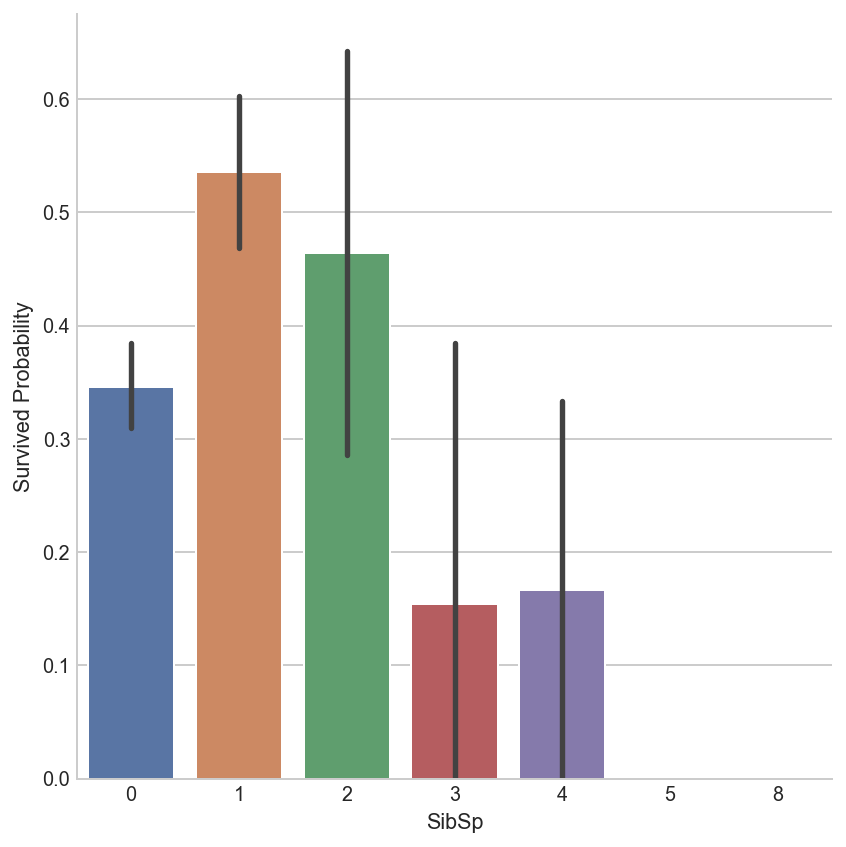

In [254]:
g= sns.factorplot(x = "SibSp", y = "Survived", data = df_new_train, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

**We can see that** when the number of siblings and spouse (SibSp) is more than 2, the survival probability decreases sharply. We can use this plot in order to extract the new feature.  **For example**, we can define new variable as SibSp2 and set 2 as treshold. if SibSp is equal to or less than 2, the value of SibSp2 equals to 1, otherwise 0.    

<a id = '16'></a><br>
## 6.3 Parch and Survived
       

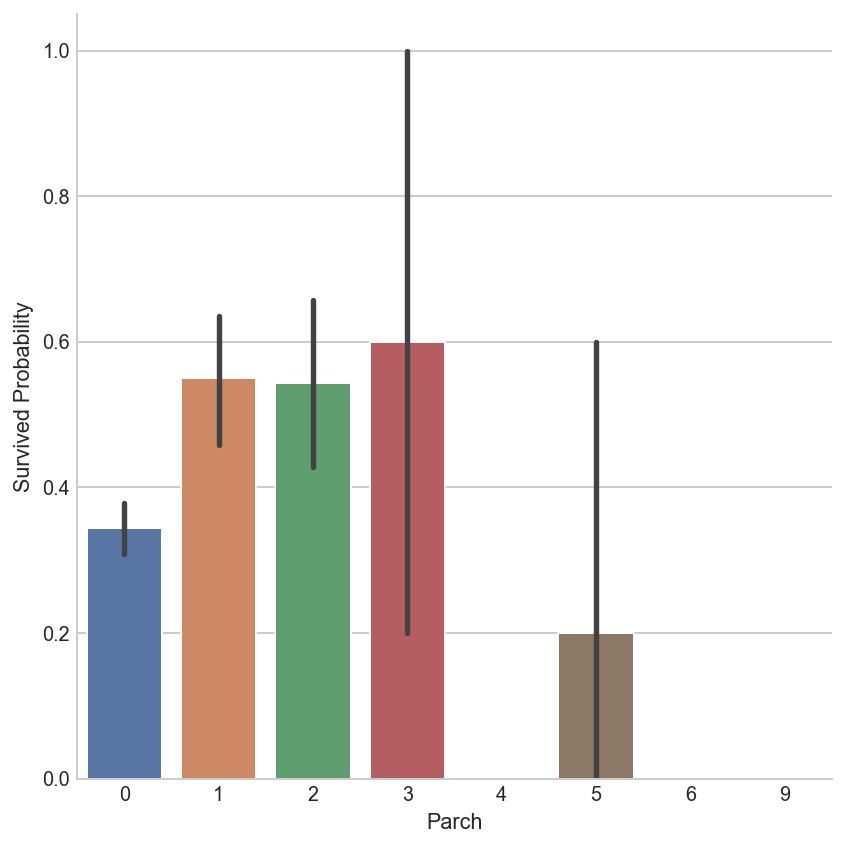

In [255]:
g= sns.factorplot(x = "Parch", y = "Survived", data = df_new_train, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

**At first glance** at the above plotting,  we can say that Passengers with fewer family members are more likely to survive, and Parch with 3 has the highest survival probability. However black vertical line refers to standard deviation. Parch with 3 has very high standard deviation, therfore this relation is not enough to extract new feature, **but SibSp and Parch can be used together for extracting new feature.** 
  

<a id = '17'></a><br>
## 6.4 Pclass and Survived
       

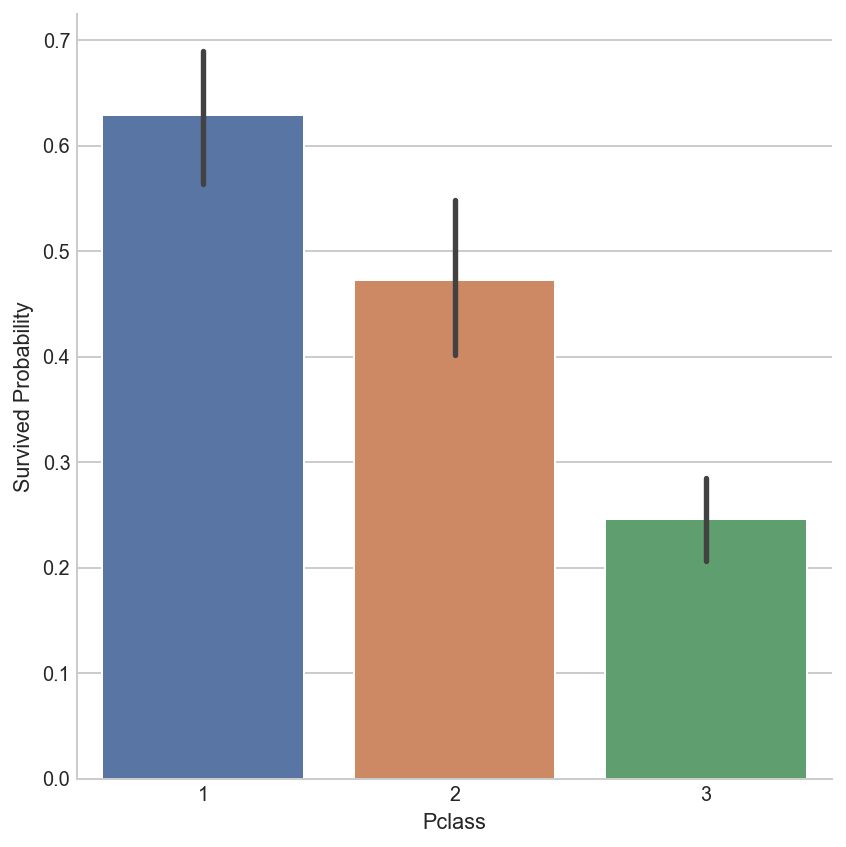

In [256]:
g= sns.factorplot(x = "Pclass", y = "Survived", data = df_new_train, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

**First class** passengers have the highest survival rate with 62.9% while 3rd class passengers have the lowest survival rate with 24.2 . 

<a id = '18'></a><br>
## 6.5 Age and Survived
       

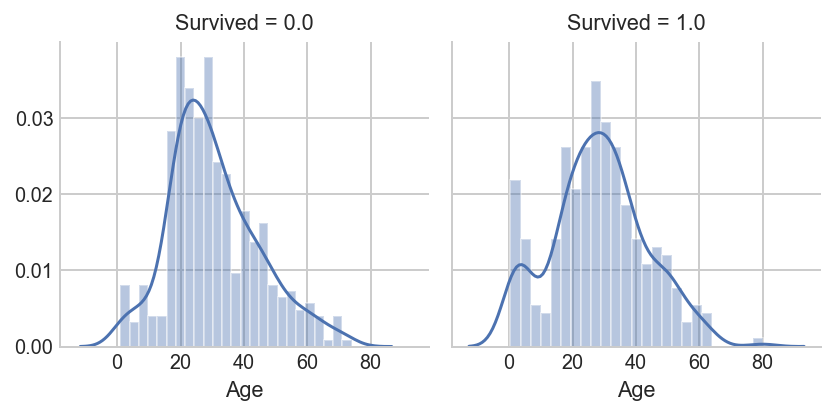

In [257]:
g= sns.FacetGrid(df_new_train, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

The graph on the left shows the disturibition of the died passengers while The graph on the right demostrates the disturibition of the survived passengers. 
* As seen in the chart on the right, the rate of survival of children aged 0-8 is very high, which indicates that **children were given priority**
*  The rate of survival of elderly passengers aged over 70 is very high, which indicates that **old passengers were also given priority**
* Most of the passengers in the Titanic were between the ages of 15-35.
* Most of the **died passengers** in the Titanic were between the ages of **15-30.**
* Most of the **survived passengers** in the Titanic were between the ages of **20-35.**
* Both the left and right graphs have **gaussian distribution**.
* **We can use the Age distributions for filling the missing values in "Age" variable.** 

<a id = '19'></a><br>
## 6.6 Pclass, Age and Survived
      

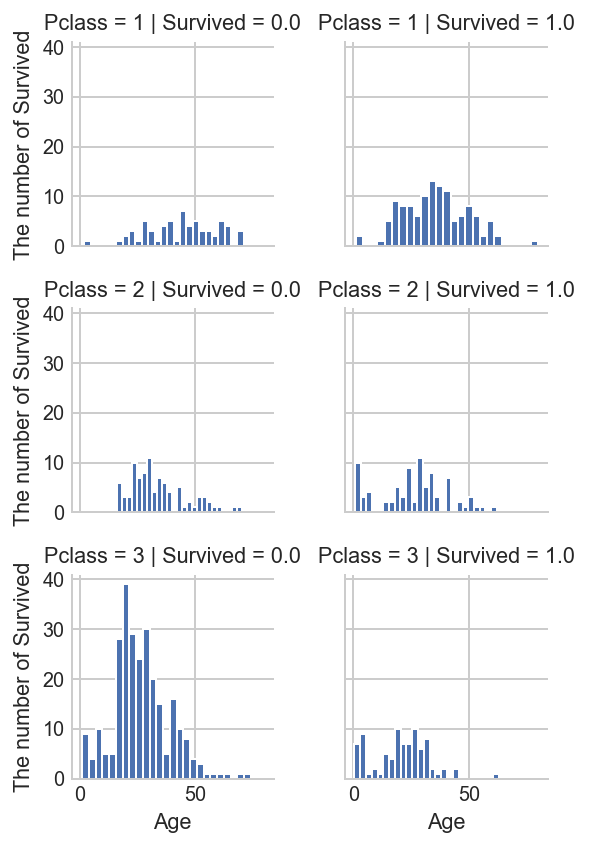

In [258]:
g = sns.FacetGrid(df_new_train, col="Survived", row = "Pclass", size = 2)
g.map(plt.hist, "Age", bins = 25)
g.set_ylabels("The number of Survived")
plt.show()

We can say that:
* The majority of passengers belong to 3rd class. The great number of 3rd class passengers didnot survive. From this, we can deduce that there is an inverse proportion between the number of passengers in a class and the rate of living.
* While the survival rates of the first class passengers are significantly higher, there is no significant difference between the survival and death rates of the second class passengers.

<a id = '20'></a><br>
## 6.7 Embarked, Sex, Pclass and Survived
      

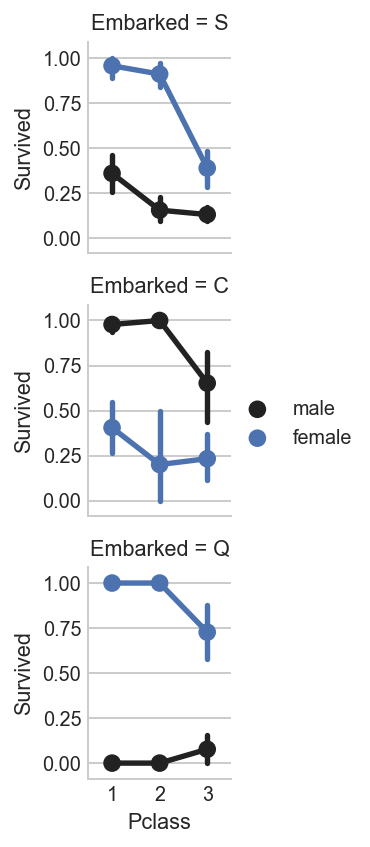

In [259]:
g = sns.FacetGrid(df_new_train, row = "Embarked", size = 2)
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

It can be said:
* All females on first and second classes, which embarked from Queenstown,survived while all men on first and second classes, which embarked from Queenstown,died.
* Almost all females on first and second classes, which embarked from Southampton,survived while just %30 of women which is 3rd class and embarked from Southampton, survived.
* Men embared from Cherbourg, have the highest survival probability if ther are compared with other men embarked from Southampton and Quuenstown.
 

<a id = '21'></a><br>
## 6.8 Embarked, Sex, Fare and Survived

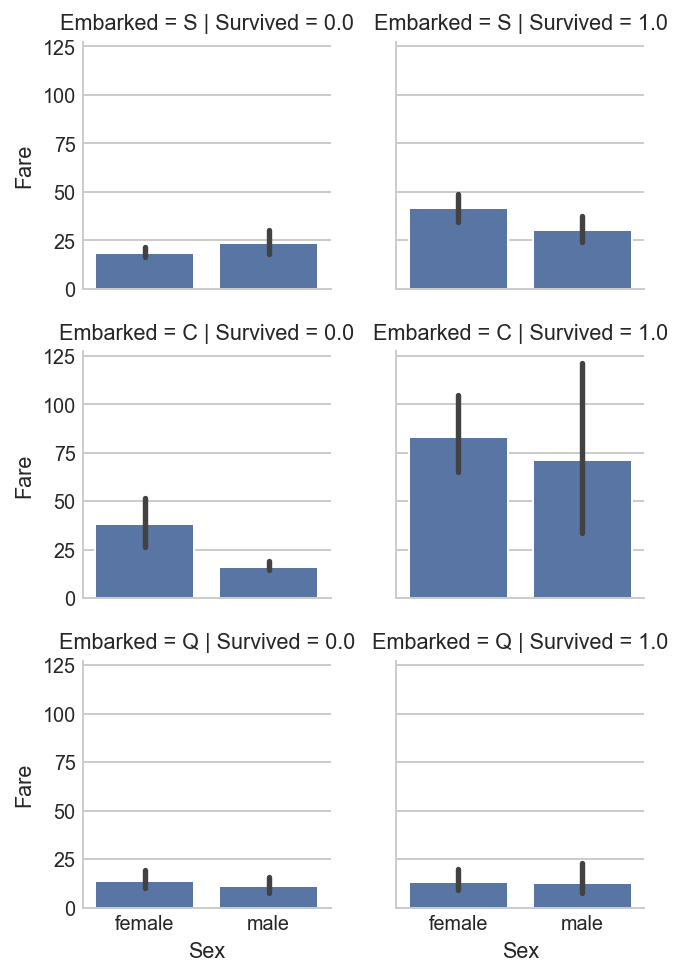

In [260]:
g = sns.FacetGrid(df_new_train, row = "Embarked", col="Survived", size = 2.3)
g.map(sns.barplot, "Sex", "Fare")
g.add_legend()
plt.show()

As we can see from above plotting:
* People who paid more money and embarked from Cherbourg and Southampton ports have more chance to survive than people who embarked from same ports but paid less. 
* Fare does not have effect of the survival probability of people who embarked from Quuenstown. 



<a id = '22'></a><br>
## 6.9 Pclass, Sex and Survived

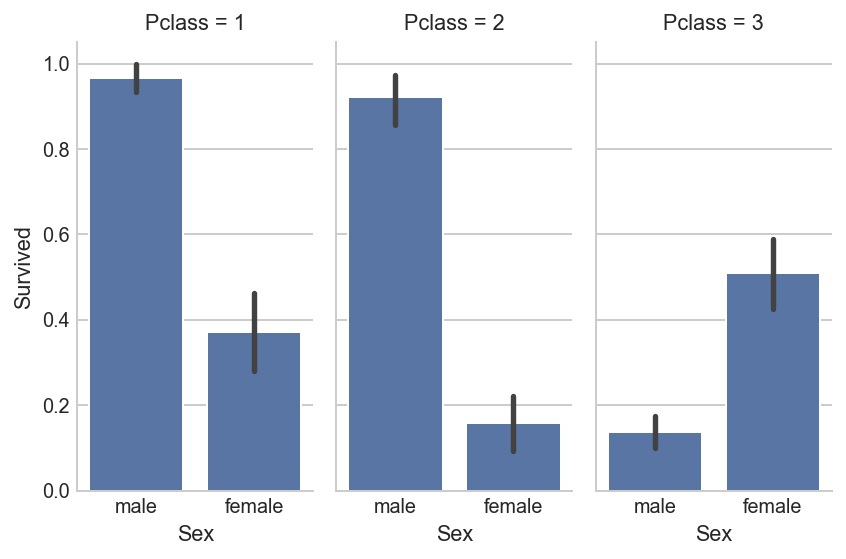

In [261]:
g = sns.FacetGrid(df_new_train, col="Pclass", height=4, aspect=.5)
g.map(sns.barplot, "Sex", "Survived")
plt.show()

<a id = '23'></a><br>
# 7. Filling the missing values in Age variable


I prefer to handle missing values in Age variable because of its complexity. As we see in missing value section that variable Age has 256 missing values. We need to look depth inside the Age variable and its relationship with other varables. 

In [262]:
# This code is giving all variables whose Age number is  NaN. 
df_new_train[df_new_train["Age"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
17,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373
19,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1.0,2649
26,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0.0,2631
27,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1.0,330959
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,1300,3,female,0,NaN,334915
1291,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,1302,3,female,0,NaN,365237
1294,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
1297,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309


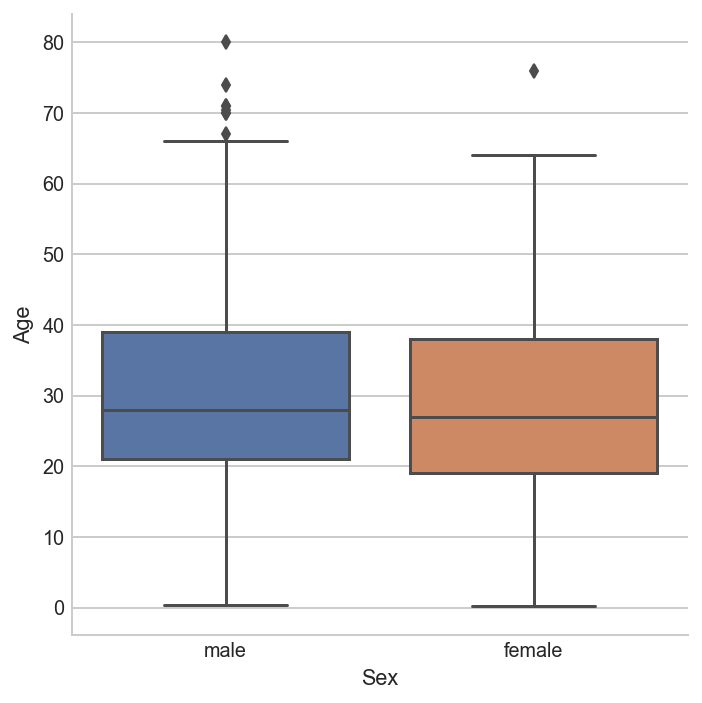

In [263]:
# let's look at relationship between Age and Sex variables.
sns.factorplot(x = "Sex", y = "Age", data = df_new_train, kind = "box")

**It is very clear** that distribution and median values of both men and females are almost similiar. Therefore we cannot use gender variables directly for filling missing values.  

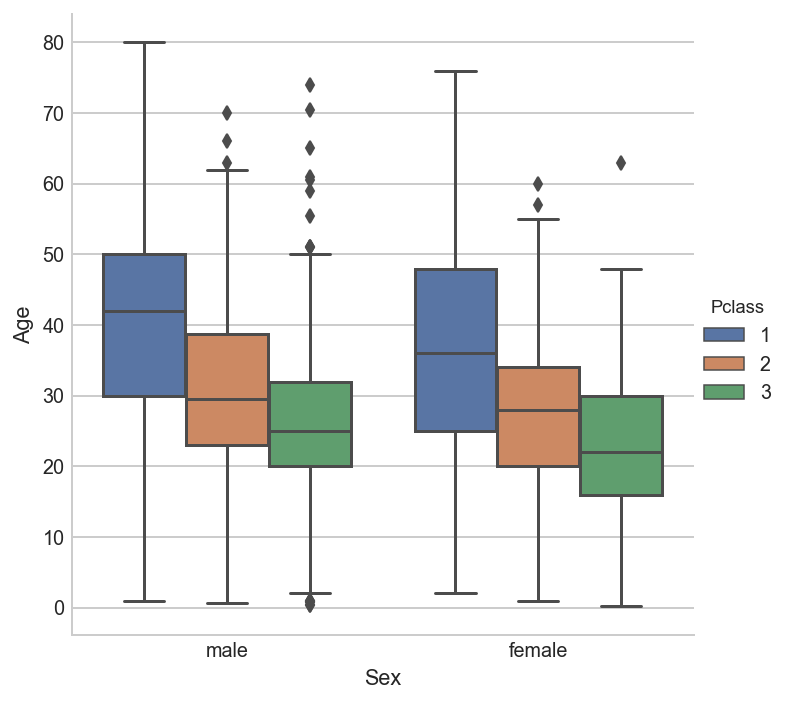

In [264]:
# let's look at relationship between Pclass, Age and Sex variables.
sns.factorplot(x = "Sex", y = "Age", hue = "Pclass", data = df_new_train, kind = "box")

It can be seen that this realtionship give us much more valuable perspective. For example:
* we might say that if a person is male and on first class, his age can be 42 which is the median value of men on first class.
* we might say that if a person is female and on third class, her age can be filled by 22 which is the median value of females on third class.


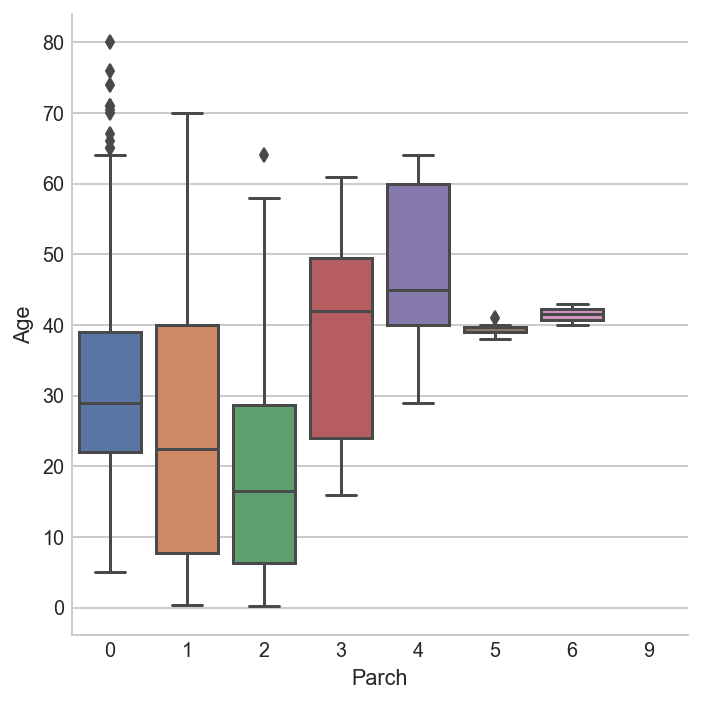

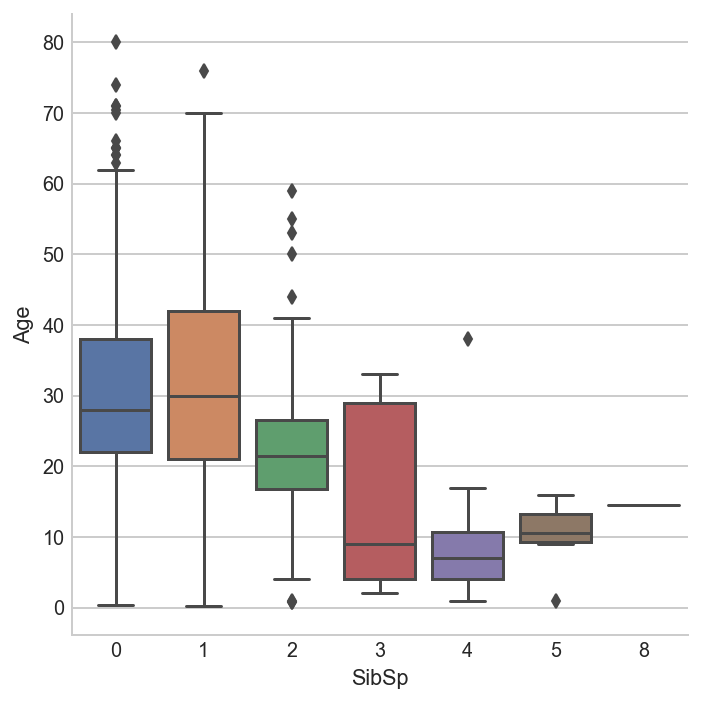

In [265]:
# let's look at relationship between Age and Parch variables and between Age and SibSp variables.

sns.factorplot(x = "Parch", y = "Age", data = df_new_train, kind = "box");
sns.factorplot(x = "SibSp", y = "Age", data = df_new_train, kind = "box");

**We can say:**
* Age of passengers with parch equal to and less than 2 can be filled by 22 which is the avarage median value of Parch 0, 1 and 2.
* Age of passengers with parch equal to and greater than 3 can be filled by 40 which is the avarage median value of Parch 3 and above.

**We can divide SibSp into two groups as follow:**
* Age of passengers with SibSp equal to and less than 2 can be filled by 25 which is the avarage median value of SibSp 0, 1 and 2.
* Age of passengers with SibSp equal to and greater than 3 can be filled by 10 which is the avarage median value of SibSp 3 and above.

In [266]:
# We use list comprehension to tranform "Sex" variable from Object to numerical variable...
# because ı want to see correlation with Sex and other variables.
df_new_train["Sex"] = [1 if i == "male" else 0 for i in df_new_train["Sex"]]
df_new_train["Sex"]

0       1
1       0
2       0
3       0
4       1
       ..
1294    1
1295    0
1296    1
1297    1
1298    1
Name: Sex, Length: 1299, dtype: int64

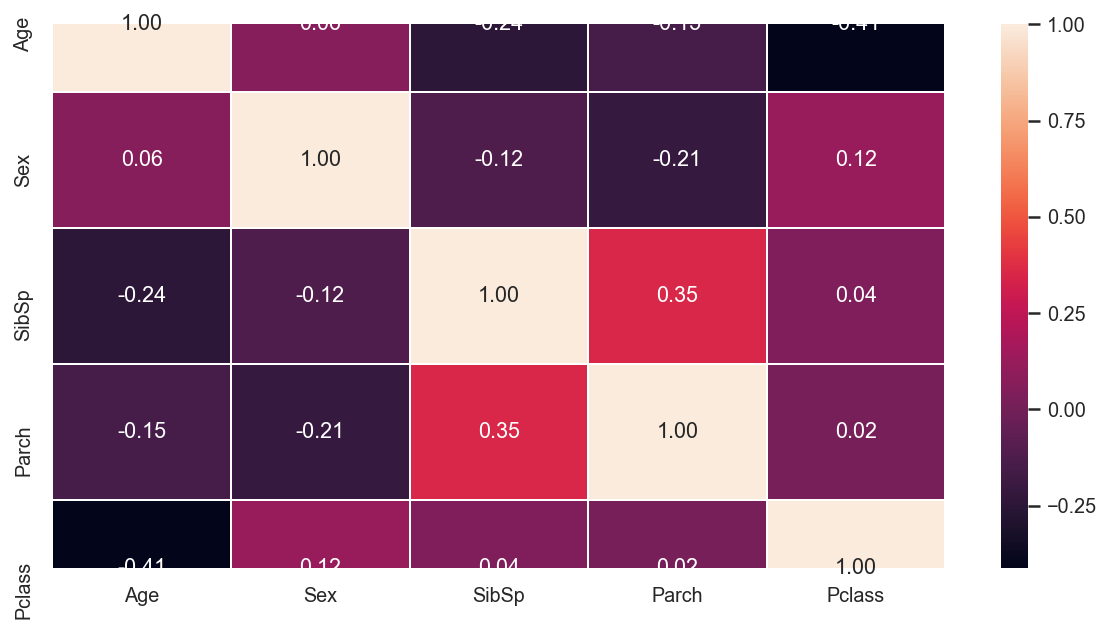

In [267]:
# Correlation Matrix
var_list = ["Age", "Sex", "SibSp", "Parch", "Pclass"]
sns.set(font_scale=0.9)
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(df_new_train[var_list].corr(), annot = True, fmt = ".2f", linewidths=0.5, ax=ax) 
plt.show()

**Pclass, Parch and SibSp have obvious correlation with Age while Sex doesn't have. Therefore it can be logical if we use Pclass, Parch and SibSp variables for filling the missing values in Age variable.**

In [268]:
# Finding the indices of the missing values in Age variable.
Age_index= df_new_train["Age"][df_new_train["Age"].isnull()].index
Age_index

Int64Index([   5,   17,   19,   26,   27,   28,   30,   31,   35,   41,
            ...
            1246, 1247, 1261, 1263, 1265, 1289, 1291, 1294, 1297, 1298],
           dtype='int64', length=256)

In [269]:
# Let's filling missing values of Age 
for i in Age_index:
    predicted_Age = df_new_train["Age"][((df_new_train["SibSp"] == df_new_train.iloc[i]["SibSp"])&(df_new_train["Pclass"] == df_new_train.iloc[i]["Pclass"])&(df_new_train["Parch"] == df_new_train.iloc[i]["Parch"]))].median()
    Age_med = df_new_train["Age"].median()
    
    if not np.isnan(predicted_Age):
        df_new_train["Age"].iloc[i] = predicted_Age
    else:
         df_new_train["Age"].iloc[i] = Age_med
    
    
    
    
    
    

<a id = '24'></a><br>
# 8. Feature engineering